In [1]:
##Part 1

import json
import preprocessor as p

temp1 = open('savedtweets_americalatina.json')
temp2 = open('savedtweets_machinelearning.json')
temp3 = open('savedtweets_superleague.json')
temp4 = open('savedtweets_weibo.json')

tweets1 = json.load(temp1)
tweets2 = json.load(temp2)
tweets3 = json.load(temp3)
tweets4 = json.load(temp4)

temp1.close
temp2.close
temp3.close
temp4.close

def removeNonLat(tweets):
    ag = 0
    latkey = "latitude"
    temptweets = []
    for tweet in tweets:
        if latkey in tweet.keys():
            temptweets.append(tweet)
    return temptweets

def preproClean(tweets):
    temptweets = []
    for tweet in tweets:
        tweet["text"] = p.clean(tweet["text"]);
        #print(tweet)
        #print()
    return tweets

    
print(tweets1[5]["text"])
tweets1nl = removeNonLat(tweets1)
tweets2nl = removeNonLat(tweets2)
tweets3nl = removeNonLat(tweets3)
tweets4nl = removeNonLat(tweets4)
print(tweets1nl[0]["text"])


tweets1cl = preproClean(tweets1nl)
tweets2cl = preproClean(tweets2nl)
tweets3cl = preproClean(tweets3nl)
tweets4cl = preproClean(tweets4nl)
print(tweets1cl[5]["screen_name"])
print(tweets1cl[5]["latitude"])

file1 = open("prep_tweets_class0.json" ,"w")
json.dump(tweets1cl, file1)
    
file2 = open("prep_tweets_class1.json" ,"w")
json.dump(tweets2cl, file2)

file3 = open("prep_tweets_class2.json" ,"w")
json.dump(tweets3cl, file3)
    
file4 = open("prep_tweets_class3.json" ,"w")
json.dump(tweets4cl, file4)
    
file1.close()
file2.close()
file3.close()
file4.close()




💡Compartimos Mapa de Portales de #DatosAbiertos de Justicia de América Latina de la @RedRija
 #JusticiaAbierta
📌https://t.co/sifAPvGPm0 https://t.co/ztazgLnIU6
RT @PAZEUGENIA: @sanchezcastejon @CasaReal Majestad por favor hay compatriotas españoles sin vacunar y @sanchezcastejon quiere regalar vacu…
chefinkrt1
-22.9110137


44


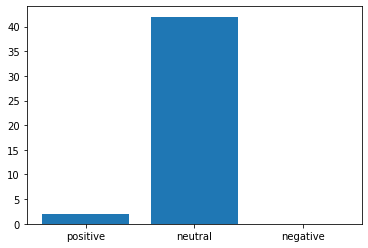

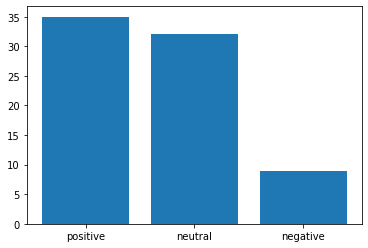

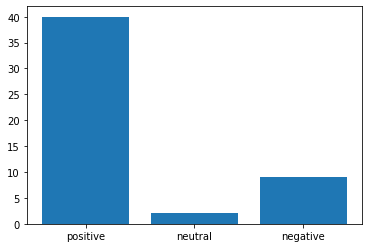

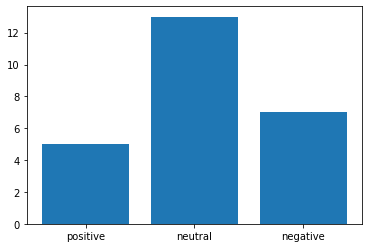

In [2]:
##part 2
from textblob import TextBlob
import matplotlib.pyplot as plt

def tweetSentiment(tweets):
    sentiment_dict = {"positive": 0, "neutral" : 0, "negative" : 0}
    for tweet in tweets:
        blob = TextBlob(tweet["text"])
        if blob.sentiment.polarity > 0:
            sentiment_dict['positive'] += 1 
        elif blob.sentiment.polarity == 0:
            sentiment_dict['neutral'] += 1 
        else:
            sentiment_dict['negative'] += 1
    return sentiment_dict
            
temp0 = open('prep_tweets_class0.json')
temp1 = open('prep_tweets_class1.json')
temp2 = open('prep_tweets_class2.json')
temp3 = open('prep_tweets_class3.json')


newtweets0 = json.load(temp0)
newtweets1 = json.load(temp1)
newtweets2 = json.load(temp2)
newtweets3 = json.load(temp3)
print(len(newtweets0))

dict0 = tweetSentiment(newtweets0)
dict1 = tweetSentiment(newtweets1)
dict2 = tweetSentiment(newtweets2)
dict3 = tweetSentiment(newtweets3)

plt.bar(dict0.keys(), dict0.values())
plt.show()

plt.bar(dict1.keys(),dict1.values())
plt.show()

plt.bar(dict2.keys(),dict2.values())
plt.show()

plt.bar(dict3.keys(),dict3.values())
plt.show()



In [3]:
##Part 3
alltweetsclass = []
alltweets = []
for tweet in newtweets0:
    alltweets.append(tweet)
    alltweetsclass.append(0)
    
for tweet in newtweets1:
    alltweets.append(tweet)
    alltweetsclass.append(1)
    
for tweet in newtweets2:
    alltweets.append(tweet)
    alltweetsclass.append(2)
    
for tweet in newtweets3:
    alltweets.append(tweet)
    alltweetsclass.append(3)



In [37]:
## Part 4
import numpy as np

mlarray = np.empty(5)
for tweet in alltweets:
    length = len(tweet["text"])
    rt_count = tweet["retweet_count"]
    latitude = tweet["latitude"]
    longitude = tweet["longitude"]
    if tweet["lang"] == "en":
        lang = 0
    else:
        lang = 100
    newrow = np.array([length, rt_count, latitude, longitude, lang])
    mlarray = np.vstack([mlarray, newrow])
x_values = np.delete(mlarray, 0, 0)

knn 66.80952380952381 	 11.507761356083616
gnb 62.0 	 12.761194010058707
clf 49.523809523809526 	 12.706346727739362
<class 'numpy.dtype[float64]'>
(196,)


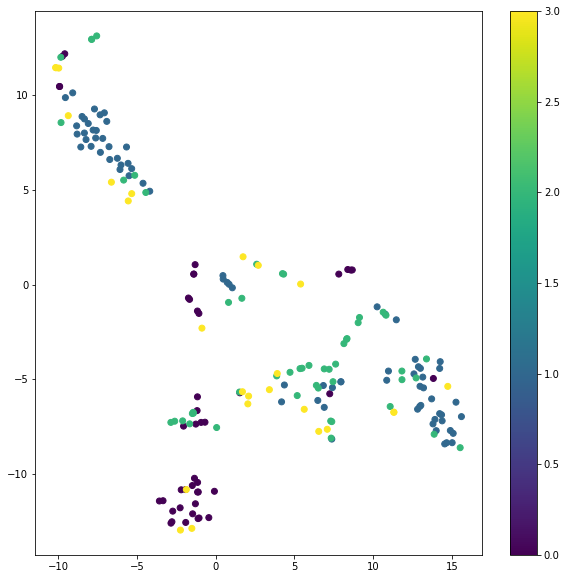

In [104]:
## Part 5
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.manifold import TSNE
    
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold


y_values = np.array(alltweetsclass)

x_train, x_test, y_train, y_test = train_test_split(x_values, y_values)

knn = KNeighborsClassifier()
gnb = GaussianNB()
clf = SGDClassifier(loss="modified_huber", penalty="l2")
tsne =TSNE(n_components=2).fit(X=x_train,y=y_train )

kfold = KFold(n_splits=10, shuffle=True)

knn_scores = cross_val_score(estimator=knn, X=x_train, y=y_train, cv=kfold)
gnb_scores = cross_val_score(estimator=gnb, X=x_train, y=y_train, cv=kfold)
clf_scores = cross_val_score(estimator=clf, X=x_train, y=y_train, cv=kfold)


print("knn",knn_scores.mean()*100,"\t", knn_scores.std()*100)
print("gnb",gnb_scores.mean()*100, "\t",gnb_scores.std()*100)
print("clf",clf_scores.mean()*100,"\t", clf_scores.std()*100)


print(type(x_train.dtype))

x_reduced = tsne.fit_transform(x_values)# used the all data
figure = plt.figure(figsize=(10,10))
print(y_values.shape)
dots = plt.scatter(x_reduced[:,0], x_reduced[:,1],c=y_values)
colorbar = plt.colorbar(dots)

there are some note worthy groups and some that not so note worthy. In class 0 the vast majority of the them are clusterd in the bottom left. With some outliers. Class 1 has a large tite group in the top left and a smaller not as tite group in the bottom right with a couple scattered in between. Class 2 is a loose group that sits in the middle of the 3 previuosly stated groups but sits closer to the bottom right, with some outliers in the top left direction. class 3 seems to fit anywhere that the other 3 groups are evenly distributed amogst the other groups.